# 🧾 Judul Project:

## Optimasi Penjualan Retail Sederhana Melalui Analisis Data Penjualan

---

# 🎯 Tujuan Project:

- Menganalisis performa produk, brand, dan kategori
- Menilai pengaruh diskon terhadap penjualan
- Mengungkap pola penjualan per bulan & wilayah
- Menyajikan insight melalui dashboard interaktif

---

# 📝 Exploratory Data Analysis (EDA)

In [1]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [2]:
# Load dataset
df = pd.read_csv('clean_data.csv')

In [3]:
# Memformat tipe data
df['order_date'] = pd.to_datetime(df['order_date'], yearfirst=True, errors='coerce')

month = ['January', 'February', 'March', 'April', 'May', 'June',
         'July', 'August', 'September', 'October', 'November', 'December']

df['month'] = pd.Categorical(values=df['month'].map(lambda x: x.strip()), categories=month, ordered=True)

labels = ['Low', 'Moderate', 'High', 'Very High']

df['discount_range'] = pd.qcut(df['discount'], 4)
df['discount_category'] = pd.qcut(df['discount'], 4, labels=labels)

df = df.reindex(columns=df.columns.tolist()[:11] + df.columns.tolist()[-2:] + df.columns.tolist()[11:-2])

In [4]:
# Menampilkan data
df.head()

,order_id,order_date,year,month,product_name,category,brand,unit_price,quantity,total_price,discount,discount_range,discount_category,is_discounted,final_price,customer_id,customer_name,region
0,ORD0418,2023-02-22,2023,February,Produk 95,Minuman,Levi's,11722,1,11722,0.22,"(0.15, 0.22]",High,Yes,9143,C128,Customer 128,Bandung
1,ORD0291,2022-10-18,2022,October,Produk 70,Pakaian,Indomaret,11645,5,58225,0.21,"(0.15, 0.22]",High,Yes,45998,C225,Customer 225,Bandung
2,ORD0096,2022-04-06,2022,April,Produk 56,Snack,Levi's,32965,5,164825,0.26,"(0.22, 0.3]",Very High,Yes,121970,C191,Customer 191,Medan
3,ORD0088,2022-03-29,2022,March,Produk 83,Minuman,Indomaret,45411,4,181644,0.03,"(-0.001, 0.0775]",Low,Yes,176195,C132,Customer 132,Yogyakarta
4,ORD0078,2022-03-19,2022,March,Produk 58,Snack,Indomaret,7717,2,15434,0.21,"(0.15, 0.22]",High,Yes,12193,C199,Customer 199,Yogyakarta


In [5]:
# Menampilkan informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_id           2000 non-null   object        
 1   order_date         2000 non-null   datetime64[ns]
 2   year               2000 non-null   int64         
 3   month              2000 non-null   category      
 4   product_name       2000 non-null   object        
 5   category           2000 non-null   object        
 6   brand              2000 non-null   object        
 7   unit_price         2000 non-null   int64         
 8   quantity           2000 non-null   int64         
 9   total_price        2000 non-null   int64         
 10  discount           2000 non-null   float64       
 11  discount_range     2000 non-null   category      
 12  discount_category  2000 non-null   category      
 13  is_discounted      2000 non-null   object        
 14  final_pr

In [6]:
# Menampilkan statistik deskriptif kolom bertipe number
df.describe(include='number').iloc[:, 1:].round(2)

,unit_price,quantity,total_price,discount,final_price
count,2000.00,2000.00,2000.00,2000.00,2000.00
mean,27182.58,3.03,81971.59,0.15,69574.77
std,12855.65,1.41,57671.71,0.09,49360.57
min,6645.00,1.00,6645.00,0.00,4784.00
25%,15093.00,2.00,35678.00,0.08,30442.00
50%,26566.00,3.00,65940.00,0.15,56033.00
75%,39393.00,4.00,119444.00,0.22,97816.00
max,49039.00,5.00,245195.00,0.30,237839.00


In [7]:
# Menampilkan statistik deskritif kolom bertipe object
df.describe(include='O')

,order_id,product_name,category,brand,is_discounted,customer_id,customer_name,region
count,2000,2000,2000,2000,2000,2000,2000,2000
unique,493,100,5,5,2,208,208,5
top,ORD0012,Produk 47,Minuman,Levi's,Yes,C190,Customer 190,Bandung
freq,13,34,428,487,1960,39,39,470


In [8]:
# Mengecek nilai kosong
is_na = 'Tidak' if df.isna().any().any() == False else 'Ya'
print('Apakah terdapat nilai kosong? %s' % is_na)

Apakah terdapat nilai kosong? Tidak


In [9]:
# Mengecek nilai duplikat
is_duplicated = 'Tidak' if df.duplicated(keep='first').any() == False else 'Ya'
print('Apakah terdapat nilai duplikat? %s' % is_duplicated)

Apakah terdapat nilai duplikat? Tidak


---

# 📝 1. Analisis performa produk, brand, dan kategori


## Visualisasi Top 10 Produk Terlaris

In [10]:
# Melakukan agregasi untuk mengetahui top 10 produk terlaris
df_agg = (df.groupby('product_name')['quantity'].sum().nlargest(10).reset_index()
          .rename(columns={'quantity':'total_quantity'}))

product = pd.read_csv('products.csv')[['product_name', 'brand']]

df_agg = (pd.merge(left=df_agg, right=product, on='product_name', how='left')
          .reindex(columns=['brand', 'product_name', 'total_quantity']))

df_agg

,brand,product_name,total_quantity
0,Aqua,Produk 47,112
1,Lifebuoy,Produk 19,96
2,Lifebuoy,Produk 21,94
3,Aqua,Produk 28,93
4,Aqua,Produk 68,93
5,Indomaret,Produk 57,87
6,Indomaret,Produk 86,85
7,Lifebuoy,Produk 38,83
8,Aqua,Produk 41,82
9,Levi's,Produk 54,82


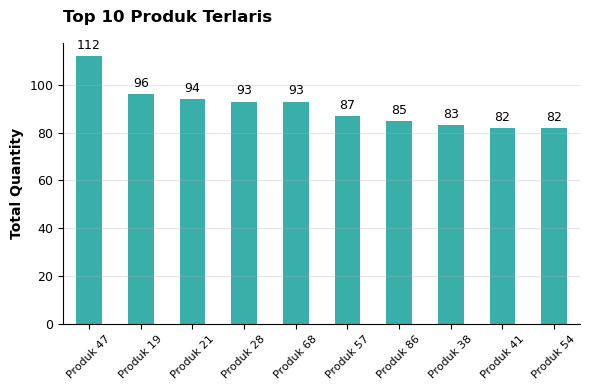

In [11]:
# Visualisasi
fig = (df_agg.plot(kind='bar', x='product_name', y='total_quantity', legend=False, figsize=(6,4), color='#3AAFA9', alpha=1))

plt.title('Top 10 Produk Terlaris', fontsize=12, fontweight='bold', loc='left', color='black', pad=15)
plt.xlabel('')
plt.ylabel('Total Quantity', color='black', fontsize=10, fontweight='bold', loc='center', rotation=90)

plt.xticks(fontsize=8, color='black', rotation=45)
plt.yticks(fontsize=9, color='black')

container = fig.containers[0]
fig.bar_label(container, fontsize=9, fontweight='medium', padding=3, color='black')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
sns.despine(left=False, top=True, right=True, bottom=False)
plt.show()

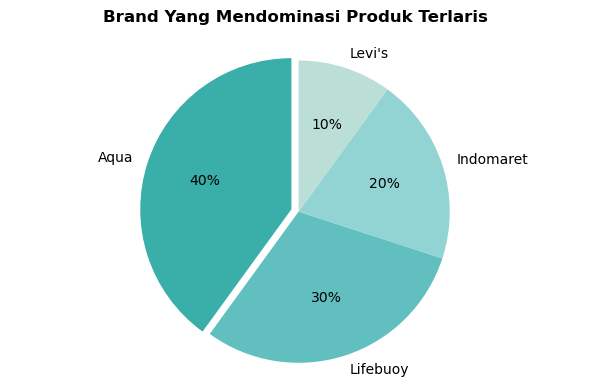

In [12]:
# Brand yang mendominasi top 10 produk terlaris
df_brand = df_agg['brand'].value_counts(normalize=True).reset_index().rename(columns={'index':'brand', 'brand':'total'})
fig = (df_brand.plot(kind='pie', x='brand', y='total', labels=df_brand['brand'].tolist(), legend=False,
                     fontsize=10, startangle=90, figsize=(6,4), radius=1, frame=False, autopct='%2.0f%%',
                     colors=['#3AAFA9', '#61C0BF', '#92D4D3', '#BBDED6'], explode=[0.05, 0, 0, 0]))

plt.title('Brand yang mendominasi produk terlaris'.title(), fontsize=12, fontweight='bold', pad=15, color='black')
plt.ylabel('')

plt.tight_layout()
plt.axis('equal')
plt.show()

# 💡 Insight:

- Produk 47 dari Aqua menjadi produk yang paling diminati oleh pelanggan dengan total quantity 112.
- Top 10 produk terlaris didominasi oleh brand Aqua, kemudian disusul Lifebuoy, Indomaret, dan Levi's.

---

## Distribusi Revenue per Kategori

In [13]:
# Melakukan agregasi
df_agg = (df.groupby(['category'])['final_price'].sum().sort_values(ascending=False)
          .map(lambda x: round((x/df['final_price'].sum()) * 100, 1)).reset_index()
          .rename(columns={'final_price':'revenue_pct'}))
df_agg

,category,revenue_pct
0,Kebutuhan Harian,22.0
1,Elektronik,21.1
2,Minuman,19.9
3,Snack,19.1
4,Pakaian,17.9


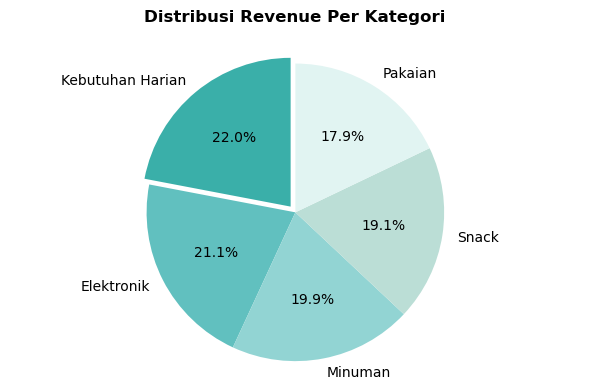

In [14]:
# Visualisasi
fig = df_agg.plot(kind='pie', x='category', y='revenue_pct', labels=df_agg['category'].values.tolist(),
                  legend=False, fontsize=10, figsize=(6,4), autopct='%2.1f%%', radius=1, frame=False,
                  colors=['#3AAFA9', '#61C0BF', '#92D4D3', '#BBDED6', '#E1F4F2'], startangle=90, explode=[0.05, 0, 0, 0, 0])

plt.title('distribusi revenue per kategori'.title(), fontsize=12, fontweight='bold', loc='center', pad=15, color='black')
plt.ylabel('')

plt.tight_layout()
plt.axis('equal')
plt.show()

# 💡 Insight:

- Kategori Kebutuhan Harian berkontribusi sebesar 22.0% terhadap total revenue, menjadikannya sebagai penyumbang pendapatan terbesar.
- Diikuti oleh Elektronik (21.1%), Minuman (19.9%), Snack (19.1%), dan Pakaian (17.9%) sebagai kontributor signifikan lainnya.

---

## Analisis Kontribusi Brand

In [15]:
# Melakukan agregasi
df_agg = df.groupby(['brand', 'category'])['final_price'].sum().unstack(level=0).fillna(0)
index = df_agg.sum(axis=1).sort_values(ascending=False).index.tolist()
df_agg = df_agg.reindex(index=index).applymap(lambda x: int(x))
df_agg

brand,Aqua,Indomaret,Levi's,Lifebuoy,Samsung
category,,,,,
Kebutuhan Harian,11012212,5656318,9395639,4558771,0
Elektronik,4725971,4630122,6981265,6251490,6705223
Minuman,4447610,7068005,7374495,5837067,2987921
Snack,1924470,3519660,10729742,5850340,4592134
Pakaian,9423657,3376331,6553001,1458685,4089407


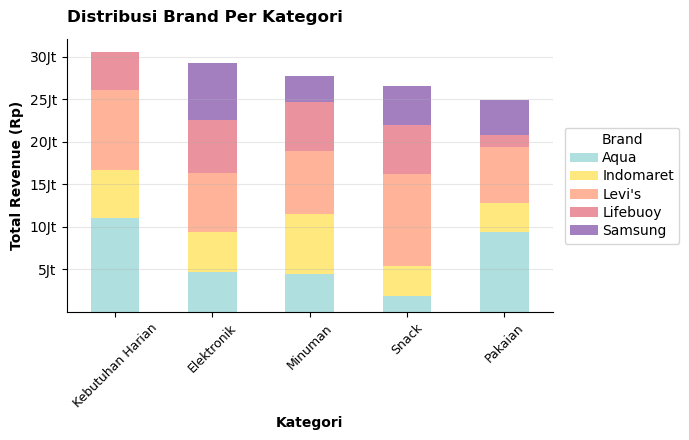

In [16]:
# Visualisasi
fig = df_agg.plot(kind='bar', stacked=True, figsize=(7,4.5), legend=True, alpha=0.5,
                 color=['#61C0BF', '#FFD500', '#FF6B35', '#D7263D', '#4B0082'])

plt.title('distribusi brand per kategori'.title(), fontsize=12, fontweight='bold', loc='left', color='black', pad=12,
         rotation=0)
plt.xlabel('Kategori', fontsize=10, fontweight='bold', color='black', loc='center', rotation=0)
plt.ylabel('Total Revenue (Rp)', fontsize=10, fontweight='bold', color='black', loc='center', rotation=90)

plt.xticks(fontsize=9, rotation=45, color='black')
ticks, _ = plt.yticks()
labels = [str(int(i/1_000_000)) + 'Jt' for i in ticks[1:-1].tolist()]
plt.yticks(ticks=ticks[1:-1], labels=labels)

plt.legend(title='Brand', title_fontsize=10, fontsize=10, loc='best', bbox_to_anchor=(1.01,0.7,0,0),
          labelspacing=0.3, handletextpad=0.3)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
sns.despine(left=False, top=True, right=True, bottom=False)
plt.show()

# 💡 Insight:

- Aqua menjadi brand yang berkontribusi paling besar pada kategori Kebutuhan Harian dan Pakaian, dengan total revenue masing-masing sebesar Rp11.012.212 dan Rp9.423.657.
- Levi's mendominasi kategori Elektronik, Minuman, dan Snack dengan total revenue sebesar Rp6.981.265, Rp7.374.495, dan Rp10.729.742.
- Indomaret dan Lifebuoy berkontribusi pada seluruh kategori, menunjukkan fleksibilitas produk yang luas.
- Samsung tidak memiliki kontribusi pada kategori Kebutuhan Harian, namun aktif di kategori lainnya.

---

# 📝 2. Menilai pengaruh diskon terhadap penjualan

## Line chart: diskon (%) vs quantity

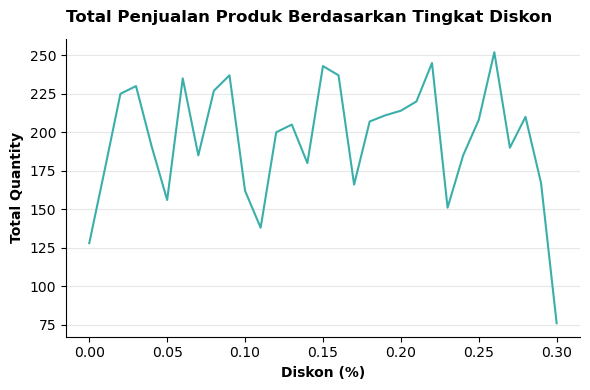

In [17]:
df_agg = df.groupby(['discount'])['quantity'].sum().reset_index()

fig = df_agg.plot(kind='line', x='discount', y='quantity', legend=False, figsize=(6,4), color='#3AAFA9', alpha=1)

plt.title('Total Penjualan Produk Berdasarkan Tingkat Diskon', fontsize=12, fontweight='bold', loc='left', color='black',
         pad=12, rotation=0)
plt.xlabel('Diskon (%)', fontsize=10, fontweight='bold', loc='center', color='black', rotation=0)
plt.ylabel('Total Quantity', fontsize=10, fontweight='bold', loc='center', color='black', rotation=90)

# Menampilkan teks total quantity (opsional)
# for x, y in zip(fig.lines[0].get_xdata()[::2], fig.lines[0].get_ydata()[::2]):
#     plt.text(x, y, str(y), fontsize=9, fontweight='light', color='black')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
sns.despine(left=False, top=True, right=True, bottom=False)
plt.show()

# 💡 Insight:

- Meskipun ada tren peningkatan quantity pada diskon-diskon menengah, ternyata diskon terbesar (30%) justru menghasilkan quantity paling kecil.
- Ini bisa jadi karena jumlah produk yang diberikan diskon besar sangat sedikit, bukan karena diskon besar tidak efektif.

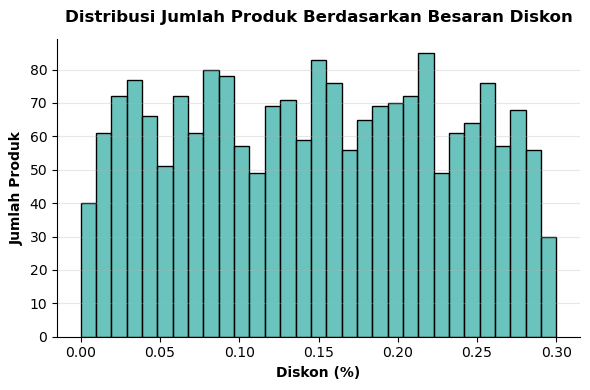

In [18]:
plt.figure(figsize=(6,4))
fig = sns.histplot(data=df, x='discount', bins=df['discount'].nunique(), legend=False, color='#3AAFA9')

plt.title('Distribusi Jumlah Produk Berdasarkan Besaran Diskon', fontsize=12, fontweight='bold', color='black', loc='center',
         rotation=0, pad=12)
plt.xlabel('Diskon (%)', fontsize=10, fontweight='bold', loc='center', color='black', rotation=0)
plt.ylabel('Jumlah Produk', fontsize=10, fontweight='bold', loc='center', color='black', rotation=90)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
sns.despine(left=False, top=True, right=True, bottom=False)
plt.show()

# 💡 Insight:

- Distribusi diskon tidak merata.
- Diskon besar (30%) diberikan ke produk yang sangat sedikit, sehingga total quantity-nya pun ikut rendah.
- Artinya, rendahnya quantity pada diskon besar bukan karena diskonnya tidak menarik, tapi karena memang jarang diberikan.

---

# 📝 3. Mengungkap pola penjualan per bulan & wilayah

## Lineplot: Trend Penjualan Bulanan

In [19]:
# Total quantity ber bulan
df.groupby(['year', 'month'])['quantity'].sum().unstack()

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2022,424,302,392,341,403,366,298,431,336,389,333,326
2023,353,328,422,414,199,0,0,0,0,0,0,0


In [20]:
last = df.loc[(df['year'] == 2023) & (df['month'] == 'May'), 'order_date'].max().strftime('%Y-%m-%d')
print('Pencatatan penjualan hanya berlangsung hingga {}'.format(last))

Pencatatan penjualan hanya berlangsung hingga 2023-05-15


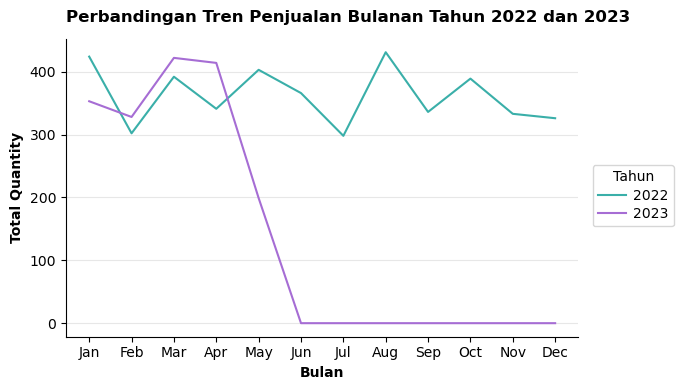

In [21]:
# Visualisasi
df_agg = df.groupby(['year', 'month'])['quantity'].sum().reset_index()

plt.figure(figsize=(7,4))

fig = sns.lineplot(data=df_agg, x='month', y='quantity', hue='year', legend=True, palette=['#3AAFA9', '#A66DD4'], alpha=1)

plt.title('Perbandingan Tren Penjualan Bulanan Tahun 2022 dan 2023', fontsize=12, fontweight='bold',
          color='black', loc='left', rotation=0, pad=12)
plt.xlabel('Bulan', fontsize=10, fontweight='bold', color='black', loc='center', rotation=0)
plt.ylabel('Total Quantity', fontsize=10, fontweight='bold', color='black', loc='center', rotation=90)

ticks, _ = plt.xticks()
month = df['month'].sort_values().unique().tolist()
labels = [i[:3] for i in month]
plt.xticks(ticks=ticks, labels=labels)

plt.legend(title='Tahun', title_fontsize=10, fontsize=10, loc='best', bbox_to_anchor=(1.2, 0.6, 0, 0),
          labelspacing=0.3, handletextpad=0.5)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
sns.despine(left=False, top=True, right=True, bottom=False)
plt.show()

# 💡 Insight:

- Terdapat kemiripan pola penjualan pada kuartal pertama tahun 2022 dan 2023, di mana terjadi peningkatan penjualan pada bulan Maret, diikuti penurunan di bulan April.
- Rendahnya penjualan pada Mei 2023 disebabkan oleh data penjualan belum tercatat secara lengkap.
- Karena data penjualan tahun 2023 belum mencakup satu tahun penuh, perbandingan menyeluruh antara 2022 dan 2023 belum dapat dilakukan secara penuh.

---

## Barplot: Penjualan per Wilayah (Region)

In [22]:
df_agg = (df.groupby('region')['final_price'].sum().sort_values(ascending=False).reset_index()
          .rename(columns={'final_price':'total_revenue'}).set_index('region'))
df_agg

,total_revenue
region,
Bandung,32077558
Yogyakarta,28468348
Jakarta,28253977
Medan,27995535
Surabaya,22354118


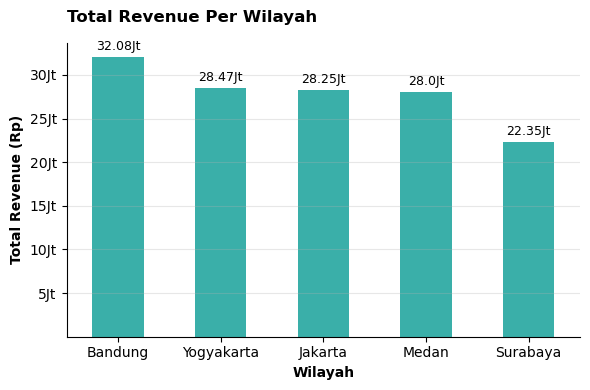

In [23]:
fig = df_agg.reset_index().plot(kind='bar', x='region', y='total_revenue', legend=False, figsize=(6,4), alpha=1,
                               color='#3AAFA9')

plt.title('Total Revenue Per Wilayah', fontsize=12, fontweight='bold', color='black', loc='left', pad=15, rotation=0)
plt.xlabel('Wilayah', fontsize=10, fontweight='bold', loc='center', color='black', rotation=0)
plt.ylabel('Total Revenue (Rp)', fontsize=10, fontweight='bold', loc='center', color='black', rotation=90)

container = fig.containers[0]
labels = [str(round(i.get_height()/1_000_000, 2)) + 'Jt' for i in fig.containers[0]]
fig.bar_label(container, labels=labels, fontsize=9, fontweight='light', color='black', padding=3)

plt.xticks(rotation=0)
ticks, labels = plt.yticks()
plt.yticks(ticks=ticks[1:-1], labels=[str(int(i/1_000_000)) + 'Jt' for i in ticks[1:-1].tolist()])

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
sns.despine(left=False, top=True, right=True, bottom=False)
plt.show()

# 💡 Insight:

- Bandung mencatatkan total pendapatan tertinggi dibandingkan wilayah lainnya.
- Posisi selanjutnya ditempati oleh Yogyakarta, diikuti oleh Jakarta, Medan, dan Surabaya sebagai kota dengan total revenue yang lebih rendah.

In [24]:
print('FIN 📍')

FIN 📍
